# Problem set 2: Schwarzschild geodesics

#### Exercise 2.1 - Unstable orbits

The effective radial potential $V_{eff}(r)$ which describes the motion of particles and light around a Schwarzschild black hole is given as

\begin{equation}
V_{eff}(r) = \frac{1}{2} \left(1 - \frac{2M}{r} \right) \left(\kappa + \frac{L^2}{r^2} \right)
\end{equation}

a) With the given equation for $V_{eff}(r)$ we can determine the extrema for a massive particle ($\kappa$ = 1) with $\frac{dV_{eff}}{dr}$ = 0

\begin{equation}
\frac{1}{2}  \frac{d}{dr} \biggl[ \left(1 - \frac{2M}{r} \right) \left(1 + \frac{L^2}{r^2} \right) \biggl] = 0
\end{equation}

\begin{equation}
\frac{1}{2}  \frac{d}{dr} \biggl[ 1 + \frac{L^2}{r^2} - \frac{2M}{r} - \frac{2 ML^2}{r^3} \biggl] = 0
\end{equation}

\begin{equation}
\frac{1}{2}  \biggl[ -\frac{2 L^2}{r^3} + \frac{2 M}{r^2} + \frac{6 ML^2}{r^4} \biggl] = 0
\end{equation}

\begin{equation}
\biggl[ -\frac{L^2}{r^3} + \frac{M}{r^2} + \frac{3 ML^2}{r^4} \biggl] = 0
\end{equation}

Multiplying with $r^4$ and divide by M to determine the extrema of the effective potential $V_{eff}$ for orbit radii $r_{min/max}$

\begin{equation}
r^2 - \frac{L^2}{M}r + 3L^2 = 0
\end{equation}

\begin{equation}
r_{min/max} = \frac{L^2}{2M} \pm \sqrt{\frac{L^4}{4M^2} - 3L^2}
\end{equation}

From the equation for $r_{min/max}$ we can see that the square root $\sqrt{\frac{L^4}{4M^2} - 3L^2}$ only exists if the angular momentum $L \geq \ L_{isco} = \sqrt{12} M$ (innermost stable circular orbit). Therfore, the smallest angular momentum exists for $L_{min} = \sqrt{12} M$.

$\rightarrow $ if $L < \sqrt{12}M$ : there are no real extrema 

$\rightarrow $ if $L >\sqrt{12}M$ : $V_{eff}(r)$ has 1 maximum & 1 minimum

b) The qualitative behavior of a particle orbit that approaches from infinity with energy E exactly equal to the maximum of the effective potential $V_{eff}(r)$ is illustrated below.

In [3]:
from IPython.display import IFrame
IFrame(".\Ex_2_1_b.pdf", width=900, height=500)

#### Exercise 2.2 - Numerical integration 

In [4]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import ode

a) According to the relations calculated in Exercise 2.1, we can define a function V_eff(r, L, $\kappa$) and its derivative D_V_eff(r, L, $\kappa$)

In [5]:
def V_eff (r, L, k):
    return 1/2 * (1 - 2/r) * (k + (L**2/r**2))  

def D_V_eff(r, L, k):
    return 1/r**2 + (3*L**2)/(2*r**4) - (L**2)/(2*r**3)

Now we can plot the effective potential V_eff(r, L, $\kappa$) for a few values of the angular momentum L

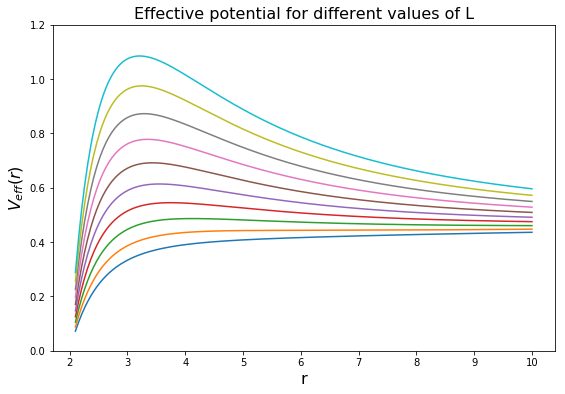

In [6]:
# Generate numbers between start and stop for the x-axis of the plot
r_space = np.linspace(start=2.1, stop=10, num=300)
# Make a list of a few values of `L` to plot
L_list = np.linspace(start=3, stop=7, num=10)

plt.figure(figsize=(9, 6))
plt.title('Effective potential for different values of L', fontsize=16)
for L in L_list:
    plt.plot(r_space, V_eff(r_space, L, k=1))

# Limit the axes to these ranges
plt.ylim(0, 1.2)
#plt.xlim(2.1, 100)
# Add axis labels
plt.xlabel('r', fontsize=16)
plt.ylabel('$V_{eff}(r)$', fontsize=16);

As we can see in the plot, 

b) In exercise 2.1 a), a relation for the radii r for which circular orbits exist was calculated.

\begin{equation}
r_{min/max} = \frac{L^2}{2M} \pm \sqrt{\frac{L^4}{4M^2} - 3L^2} \equiv r_{orbit}(L,sign)
\end{equation}

With this relation, we can define a function r_orbit(L, sign) like this

In [11]:
def r_orbit(L, sign):
    return L**2/2 + sign * np.sqrt(L**4/4 - 3 * L**2)

c-d) With the given relations

\begin{equation}
E = \left(1 - \frac{2M}{r} \right) \dot{t} \rightarrow \dot{t} = \frac{E}{1- \frac{2M}{r}}
\end{equation}

\begin{equation}
L = r^2 \dot{\phi} \rightarrow \dot{\phi} = \frac{L}{r^2}
\end{equation}

\begin{equation}
\frac{1}{2} \dot{r}^2 = \frac{1}{2} E^2 - V_{eff}(r) \rightarrow \ \dot{r} = \sqrt{E^2 - 2 V_{eff}}
\end{equation}

\begin{equation}
\ddot{r} = - V^{'}_{eff}(r) = \dot{v}
\end{equation}

we can define the function t_dot(E,r), r_dot(E, V_eff), phi_dot(L, r) and v_dot

In [29]:
def t_dot (r, E):
    return E/(1-2/r)

def phi_dot (r, L):
    return L/r**2

def r_dot (r, E, L, k, sign):
    return sign * np.sqrt(E**2 - 2*V_eff(r, L, k))

def v_dot(r, L, k):
    return - D_V_eff(r, L, k)

The function for integrating $\dot{t}$, $\dot{r}$, $\dot{\phi}$, $\dot{v}$ is given as 

In [131]:
def integrate_geodesic(r0, E, L, k, sign, step):
    tau_history = [ 0. ]
    x_history = [ [0, r0, 0, r_dot (r0, E, L, k, sign)] ]
    
    x = ode(lambda tau, x: [
        t_dot (x[1], E),
        x[3],
        phi_dot (x[1], L),
        v_dot(x[1], L, k),
    
    ]).set_integrator('zvode', method='bdf').set_initial_value(x_history[0], tau_history[0])
    
    while x.successful() and x_history[-1][1] < 3 * r0 and x_history[-1][1] > 0 and x_history[-1][2]< 10*np.pi:
        x_history.append(x.integrate(x.t + step))
        tau_history.append(x.t)
    
    return np.asarray(tau_history), np.asarray(x_history)

In [132]:
# Perform the integration
L = 5.5
r0 = r_orbit(L, 1)
t0 = 0
phi0 = 0
v0 = 4
E = np.sqrt(2*V_eff(r=r0, L=L, k=1))

tau, x = integrate_geodesic(r0=r0, E = E, L = L, k = 1, sign = 1, step = 0.5)

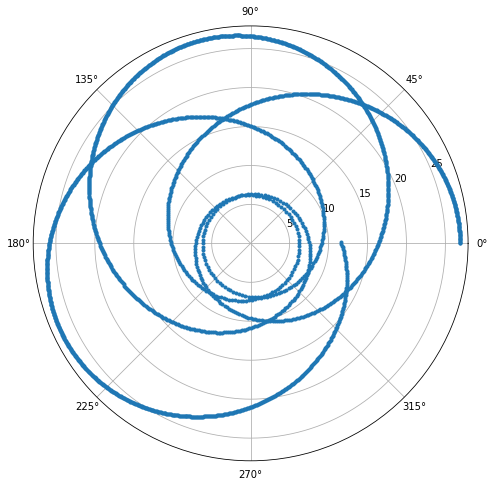

In [133]:
# You can retrieve the history of a particular
# variable by "slicing" the array `x`. For example, `x[:,0]`
# selects all rows of the array, but only the first value of each
# row. This corresponds to all values of the variable `r`.
# We make a polar plot here by treating `s` as an angle (in radians) and
# `r` as the radius corresponding to that angle.
plt.figure(figsize=(8, 8))
plt.polar(x[:,2], x[:,1], marker='.', ls='dotted');